## Some context on the TfidVectorizer and text handing in sklearn

* To represent a review to a neural network, each word has to be expressed as a number. 

* Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 

* Each review can then be represented as a vector of length feature_count. 

* Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 

* A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 

* Here we limit the number of feature_count to 40,000 to cut down the training time. 

more info available from 
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# Function removes unnecessary html tags fro the reviews

In [1]:
#function that removes html tags from txt
def remove_html_tags(x):
    from bs4 import BeautifulSoup
    return BeautifulSoup(x).get_text()

 ## Load the dataset 
 ### Inspect datset 
1- Remove unnecesary tags

2- Load 2500 entires for each class into the dataset

In [64]:
import pandas as pd
music = pd.read_json("./Digital_Music_5.json",lines = True,)
#TODO I can add the summary to the movies data

# the number of reviews present in each class
print("original Distribution\n", music['overall'].value_counts())

#apply the function to the dataset
music["reviewText"] = music["reviewText"].apply(remove_html_tags)
#shuffle the data
music.sample(frac = 1)

#select 2500 from each class
data = pd.DataFrame()
max_num = 2500
for i in range(1,6):
    d_i = music.loc[music["overall"] == i][:max_num]
    data = pd.concat([data,d_i[:max_num]])
print("new Distribution\n", data['overall'].value_counts())
data.shape

original Distribution
 5    35580
4    16536
3     6789
2     3010
1     2791
Name: overall, dtype: int64
new Distribution
 5    2500
4    2500
3    2500
2    2500
1    2500
Name: overall, dtype: int64


(12500, 9)

# Split the data into training and testing
Split ratio is 0.2 for testing and the rest for training.

Validation is done in the classifier itself.

# Convert reviews to vectors
1- Remove words which does not contribute to te meaning.

2- Use only necessary features (review, rating).
##### Transformation is done after spliting the data since the test dataset should not contribute by any mean to the training process.

In [56]:
#imports
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
stopWords = set(stopwords.words('english'))#+list(string.punctuation))

music_crop = data["reviewText"].values
print(music_crop.shape)
labels = data["overall"].values
print(type(music_crop),type(labels))
X_train, X_test, y_train, y_test = train_test_split(music_crop,labels,test_size =0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#my own validation split not useful right now
# X_train, X_Validation, y_train, y_Validation = train_test_split(X_train,y_train)

df2 = pd.DataFrame(y_train)
print(df2[0].value_counts())
"""
class: num instances in training
4    2050
3    1997
2    1994
1    1988
5    1971
"""

# You need to define X_train and X_test

tfidf_vectorizer = TfidfVectorizer(max_features=50000,stop_words = stopWords)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)
print("test data transform",X_test_transformed.shape)
print("training data transform",X_train_transformed.shape)
# print(tfidf_vectorizer.vocabulary_)

(12500,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000,) (2500,) (10000,) (2500,)
2    2038
4    2010
5    2002
1    1978
3    1972
Name: 0, dtype: int64
test data transform (2500, 42514)
training data transform (10000, 42514)


# Training the classifier
8- Since the problem is a multi-classification problem,  the classifier autmatically uses the **SOFTMAX** activation function for the output layer.

In [63]:
#imports
from sklearn.neural_network import MLPClassifier
#lbfgs
"""
# mlp = MLPClassifier(hidden_layer_sizes=(512,1024,512), activation= "relu", solver="adam",learning_rate_init=0.001, max_iter=200, shuffle=True,validation_fraction=0.1, early_stopping=True, verbose=True) 0.6 percent model

mlp = MLPClassifier(hidden_layer_sizes=(128), activation= "relu", solver="adam",learning_rate_init=0.001, max_iter=200, shuffle=True,validation_fraction=0.1, early_stopping=True, verbose=True) 0.6 percent model


"""
mlp = MLPClassifier(hidden_layer_sizes=(512), activation= "relu", solver="adam",learning_rate_init=0.001, max_iter=10, shuffle=True,validation_fraction=0.1, early_stopping=True, verbose=True)


mlp.fit(X_train_transformed,y_train)

Iteration 1, loss = 1.42405311
Validation score: 0.582000
Iteration 2, loss = 0.80131892
Validation score: 0.616000
Iteration 3, loss = 0.40351993
Validation score: 0.621000
Iteration 4, loss = 0.19982394
Validation score: 0.600000
Iteration 5, loss = 0.10436054
Validation score: 0.598000
Iteration 6, loss = 0.06139902
Validation score: 0.590000
Iteration 7, loss = 0.04021231
Validation score: 0.592000
Iteration 8, loss = 0.02860767
Validation score: 0.591000
Iteration 9, loss = 0.02196484
Validation score: 0.586000
Iteration 10, loss = 0.01758053
Validation score: 0.581000


C:\Users\moham\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=512, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Accuracy on train and test data

In [61]:

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(mlp.predict(X_train_transformed),y_train))
print(accuracy_score(mlp.predict(X_test_transformed),y_test))

y_pred = mlp.predict(X_test_transformed)
class_names = [1,2,3,4,5]


# print(accuracy_score(mlp.predict(X_test_transformed),y_test))

0.8762
0.6136


# Confusion Matrix

Normalized confusion matrix
[[0.66 0.25 0.05 0.02 0.02]
 [0.22 0.5  0.19 0.06 0.03]
 [0.04 0.19 0.47 0.24 0.07]
 [0.02 0.04 0.16 0.64 0.13]
 [0.02 0.02 0.04 0.13 0.79]]


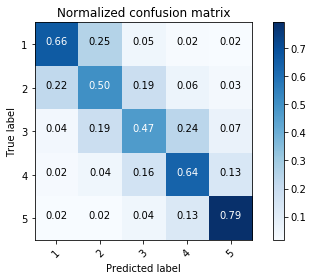

In [62]:

import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()